In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_15_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_15_4.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.0035)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.2674 - accuracy: 0.8882 - val_loss: 0.2195 - val_accuracy: 0.9089
Epoch 2/150
100000/100000 - 2s - loss: 0.2112 - accuracy: 0.9098 - val_loss: 0.2053 - val_accuracy: 0.9110
Epoch 3/150
100000/100000 - 2s - loss: 0.1993 - accuracy: 0.9126 - val_loss: 0.1988 - val_accuracy: 0.9139
Epoch 4/150
100000/100000 - 2s - loss: 0.1893 - accuracy: 0.9171 - val_loss: 0.1904 - val_accuracy: 0.9182
Epoch 5/150
100000/100000 - 2s - loss: 0.1778 - accuracy: 0.9232 - val_loss: 0.1769 - val_accuracy: 0.9255
Epoch 6/150
100000/100000 - 2s - loss: 0.1657 - accuracy: 0.9291 - val_loss: 0.1649 - val_accuracy: 0.9310
Epoch 7/150
100000/100000 - 2s - loss: 0.1542 - accuracy: 0.9338 - val_loss: 0.1571 - val_accuracy: 0.9339
Epoch 8/150
100000/100000 - 2s - loss: 0.1430 - accuracy: 0.9377 - val_loss: 0.1470 - val_accuracy: 0.9363
Epoch 9/150
100000/100000 - 2s - loss: 0.1333 - accuracy: 0.9413 - val_loss: 0.1345 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0781 - val_accuracy: 0.9819
Epoch 78/150
100000/100000 - 2s - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.0786 - val_accuracy: 0.9828
Epoch 79/150
100000/100000 - 2s - loss: 0.0206 - accuracy: 0.9927 - val_loss: 0.0957 - val_accuracy: 0.9775
Epoch 80/150
100000/100000 - 2s - loss: 0.0248 - accuracy: 0.9913 - val_loss: 0.0826 - val_accuracy: 0.9803
Epoch 81/150
100000/100000 - 2s - loss: 0.0200 - accuracy: 0.9930 - val_loss: 0.0873 - val_accuracy: 0.9806
Epoch 82/150
100000/100000 - 2s - loss: 0.0189 - accuracy: 0.9933 - val_loss: 0.0844 - val_accuracy: 0.9813
Epoch 83/150
100000/100000 - 2s - loss: 0.0204 - accuracy: 0.9928 - val_loss: 0.0857 - val_accuracy: 0.9798
Epoch 84/150
100000/100000 - 2s - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0818 - val_accuracy: 0.9793
Epoch 85/150
100000/100000 - 2s - loss: 0.0215 - accuracy: 0.9924 - val_loss: 0.0830 - val_accuracy: 0.9812
Epoch 86/150
100000/100000 -

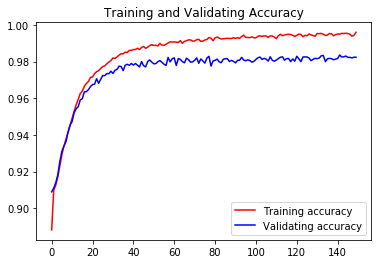

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_15_4_model.h5')